In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
import warnings

In [2]:
dengue = pd.read_csv('dengue.csv')

In [3]:
dengue

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


In [4]:
dengue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Month          1020 non-null   object
 1   Year           1020 non-null   int64 
 2   Region         1020 non-null   object
 3   Dengue_Cases   1020 non-null   int64 
 4   Dengue_Deaths  1020 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 40.0+ KB


In [5]:
dengue.dtypes

Month            object
Year              int64
Region           object
Dengue_Cases      int64
Dengue_Deaths     int64
dtype: object

In [6]:
dengue.isnull().sum()

Month            0
Year             0
Region           0
Dengue_Cases     0
Dengue_Deaths    0
dtype: int64

In [7]:
dengue['Month'] = dengue['Month'].astype('category')
dengue['Region '] = dengue['Region'].astype('category')

In [8]:
dengue.dtypes

Month            category
Year                int64
Region             object
Dengue_Cases        int64
Dengue_Deaths       int64
Region           category
dtype: object

<h1>How many are the total cases of dengue across all the regions?  </h1>

In [9]:
totalCases = dengue['Dengue_Cases'].sum()

In [10]:
totalCases

np.int64(1147425)

<h2>Insight1: The total cases of dengue across all regions are 1,147,425. </h2>

<h1>How many are the total dengue deaths across all the regions? </h1>

In [11]:
totalDeaths = dengue['Dengue_Deaths'].sum()
totalDeaths

np.int64(16844)

<h2>Insight2: The total dengue deaths across all regions are 16, 844. </h2>

<h1>Total Percentage Dengue Cases per year</h1>

In [12]:
dengue['Dengue_Cases'].sum()

np.int64(1147425)

In [13]:
YearCases = dengue.groupby('Year')['Dengue_Cases'].sum().reset_index()
YearCases

,Year,Dengue_Cases
0,2016,209544
1,2017,154155
2,2018,250783
3,2019,441902
4,2020,91041


<h2>Insights 3-7: Percentage Cases in Dengue</h2>
<ul>
    <li>In 2016: 18.26% total percentage Cases </li>
    <li>In 2017: 13.43% total percentage Cases </li>
    <li>In 2018: 21.86% total percentage Cases </li>
    <li>In 2019: 38.51% total percentage Cases </li>
    <li>In 2020:  7.93% total percentage Cases </li>
    
</ul>

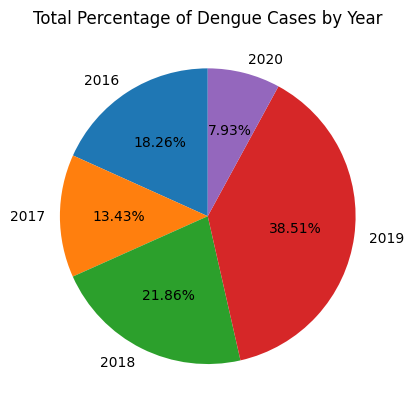

In [14]:
yearly_cases = dengue.groupby('Year')['Dengue_Cases'].sum()

percentages = (yearly_cases / yearly_cases.sum()) * 100
plt.pie(percentages, labels=yearly_cases.index.astype(str), autopct='%1.2f%%', startangle=90)
plt.title("Total Percentage of Dengue Cases by Year")
plt.show()

<h1>Total Percentage Dengue Deaths per year</h1>

In [15]:
dengue['Dengue_Deaths'].sum()

np.int64(16844)

In [16]:
yr16 = dengue[dengue['Year'] == 2016]
yr17 = dengue[dengue['Year'] == 2017]
yr18 = dengue[dengue['Year'] == 2018]
yr19 = dengue[dengue['Year'] == 2019]
yr20 = dengue[dengue['Year'] == 2020]

In [17]:
YearDeath = dengue.groupby('Year')['Dengue_Deaths'].sum().reset_index()
YearDeath


,Year,Dengue_Deaths
0,2016,8127
1,2017,4563
2,2018,1226
3,2019,1733
4,2020,1195


<h2>Insights 8-12: Percentage Deaths in Dengue</h2>
<ul>
    <li>In 2016: 48.25% total percentage of Deaths </li>
    <li>In 2017: 27.09% total percentage of Deaths </li>
    <li>In 2018:  7.28% total percentage of Deaths </li>
    <li>In 2019: 10.29% total percentage of Deaths </li>
    <li>In 2020:  7.09% total percentage of Deaths </li>
    
</ul>


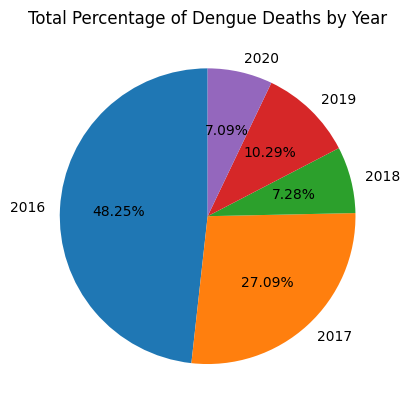

In [18]:
yearly_death = dengue.groupby('Year')['Dengue_Deaths'].sum()

percentages = (yearly_death / yearly_cases.sum()) * 100
plt.pie(percentages, labels=yearly_cases.index.astype(str), autopct='%1.2f%%', startangle=90)
plt.title("Total Percentage of Dengue Deaths by Year")
plt.show()

<h1>Which year has the highest number of dengue cases?</h1>

In [19]:
YearlyCases = dengue.groupby('Year')['Dengue_Cases'].sum()
YearlyCases.idxmax()

np.int64(2019)

In [20]:
YearlyCases.max()

np.int64(441902)

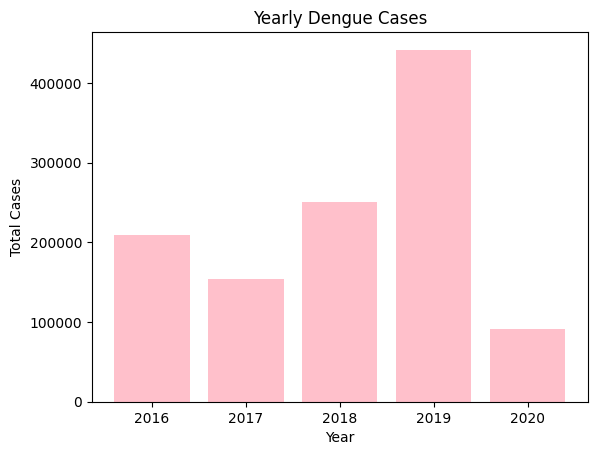

In [30]:
YearlyCases = dengue.groupby('Year')['Dengue_Cases'].sum()
yrMaxCases = YearlyCases.idxmax()

plt.bar( YearlyCases.index, YearlyCases.values, color='pink')
plt.title("Yearly Dengue Cases")
plt.xlabel("Year")
plt.ylabel("Total Cases")
plt.show()

<h2>Insights 13:The year that has the highest number of dengue cases is 2019. </h2>
<h2> Insight 14: The total number of cases in 2019 is 441,902 </h2>


<h1> What month has the most affected Dengue Cases? </h1>

In [21]:
month = dengue.groupby('Month')['Dengue_Cases'].sum()
month.idxmax()

C:\Users\Light Micro Finance\AppData\Local\Temp\ipykernel_5172\115776864.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  month = dengue.groupby('Month')['Dengue_Cases'].sum()


'August'

In [22]:
month.max()

np.int64(187554)

C:\Users\Light Micro Finance\AppData\Local\Temp\ipykernel_5172\1280895481.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  month = dengue.groupby('Month')['Dengue_Cases'].sum().reindex(month_order)


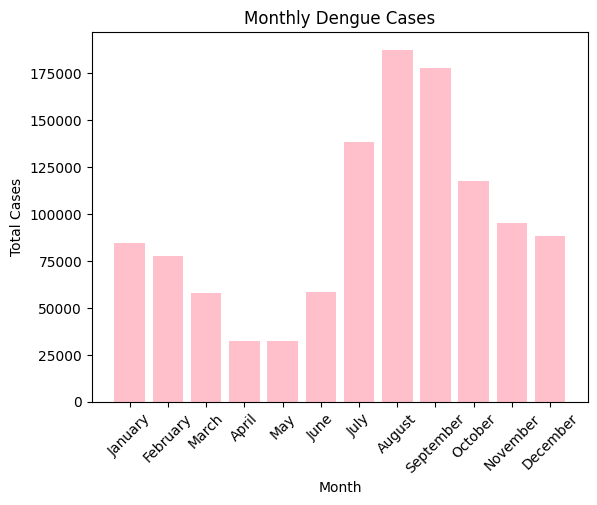

In [42]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

month = dengue.groupby('Month')['Dengue_Cases'].sum().reindex(month_order)
most_affected = month.idxmax()

plt.bar(month.index, month.values, color='pink')
plt.title("Monthly Dengue Cases")
plt.xlabel("Month")
plt.ylabel("Total Cases")
plt.xticks(rotation=45)  
plt.show()

<h2>Insight 15: The Month that has the highest number of dengue cases is August.</h2>


   <h2>Insight 16: Total of 187,554 Cases in August </h2>


<h1>Which 5 regions is the most affected by dengue?</h1>

In [23]:
region_cases = dengue.groupby('Region')['Dengue_Cases'].sum().reset_index()


Topfive = region_cases.sort_values(by='Dengue_Cases', ascending=False).head(5)
Topfive


,Region,Dengue_Cases
6,Region IV-A,163029
5,Region III,131064
10,Region VI,117523
2,NCR,115966
11,Region VII,110683


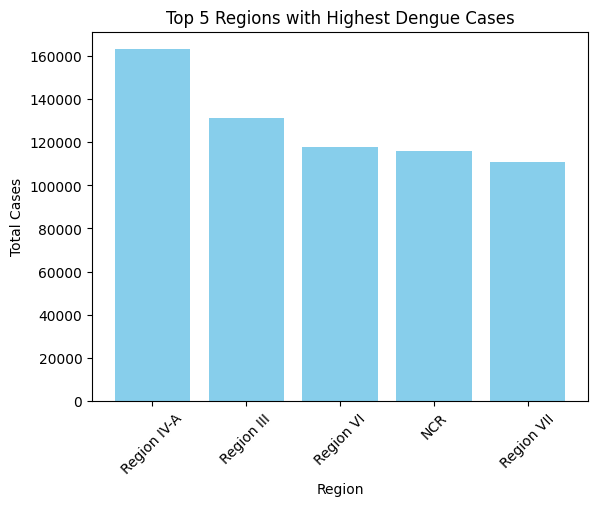

In [43]:
region_cases = dengue.groupby('Region')['Dengue_Cases'].sum().reset_index()
Topfive = region_cases.sort_values(by='Dengue_Cases', ascending=False).head(5)

plt.bar(Topfive['Region'], Topfive['Dengue_Cases'], color='skyblue')
plt.title("Top 5 Regions with Highest Dengue Cases")
plt.xlabel("Region")
plt.ylabel("Total Cases")
plt.xticks(rotation=45)  
plt.show()

<h2>Insight 17: The top five Regions are:
    <ul>
       <li>Region IV-A</li> 	
       <li>Region III	</li> 
       <li>Region VI</li> 
       <li>NCR</li> 
       <li>Region VII</li> 
    </ul>
</h2>

In [24]:
dengue.value_counts()


Month      Year  Region       Dengue_Cases  Dengue_Deaths  Region     
September  2020  Region XIII  28            31             Region XIII    1
April      2016  BARMM        109           4              BARMM          1
                 CAR          226           1              CAR            1
                 NCR          448           2              NCR            1
                 Region I     240           2              Region I       1
                                                                         ..
                 Region XIII  420           1              Region XIII    1
                 Region XII   654           2              Region XII     1
                 Region XI    557           4              Region XI      1
                 Region X     768           3              Region X       1
                 Region VIII  217           0              Region VIII    1
Name: count, Length: 1020, dtype: int64

<h1>Correlation Between Dengue Cases and Dengue Deaths</h1>

In [46]:
dengue1 = dengue['Dengue_Cases'].corr(dengue['Dengue_Deaths'])
dengue1

np.float64(0.03832213720419488)

<h2>Insight 18: There is a correlation between Dengue cases and Dengue deaths</h2>

In [47]:
dengue['Dengue_Cases'].mean()

np.float64(1124.9264705882354)

In [48]:
dengue.dtypes

Month            category
Year                int64
Region             object
Dengue_Cases        int64
Dengue_Deaths       int64
Region           category
dtype: object

In [66]:
zeroCase = dengue.groupby('Month')['Dengue_Cases'].sum()
zeroCase1 = zeroCase[zeroCase == 0].index.tolist()
zeroCase

C:\Users\Light Micro Finance\AppData\Local\Temp\ipykernel_5172\751817731.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  zeroCase = dengue.groupby('Month')['Dengue_Cases'].sum()


Month
April         32508
August       187554
December      88431
February      77801
January       84328
July         138242
June          58110
March         57576
May           32387
November      94900
October      117645
September    177943
Name: Dengue_Cases, dtype: int64

<h1>insight 19: there is no Zero Case in months, because every months there a cases</h1>

In [69]:
regionCases = dengue.groupby('Region')['Dengue_Cases'].sum()
regionsNO = regionCases[regionCases == 0].index.tolist()
regionsNO

[]

<h1>Top 5 Regions with High Dengue Deaths</h1>

In [71]:
region = dengue.groupby('Region')['Dengue_Deaths'].mean().reset_index()
high_risk_regions = region.sort_values(by='Dengue_Deaths', ascending=False).head(5)
high_risk_regions


,Region,Dengue_Deaths
2,NCR,66.800000
15,Region XII,46.600000
10,Region VI,30.416667
11,Region VII,29.333333
1,CAR,16.800000


<h2>Insight20: These are the top 5 Regions with high rate of Death cause of Dengue:
<ul>
    <li>1. NCR</li>
    <li>2. Region XII</li>
    <li>3. Region VI</li>
    <li>4. Region VII</li>
    <li>5. CAR	</li>
    
</ul>
</h2>